Load all packages you need.

In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Read the data.

In [3]:
df = pd.read_csv('data/pima-indians-diabetes-database/diabetes.csv')

Inspect the histogram of "BloodPressure". What could be outlier values?


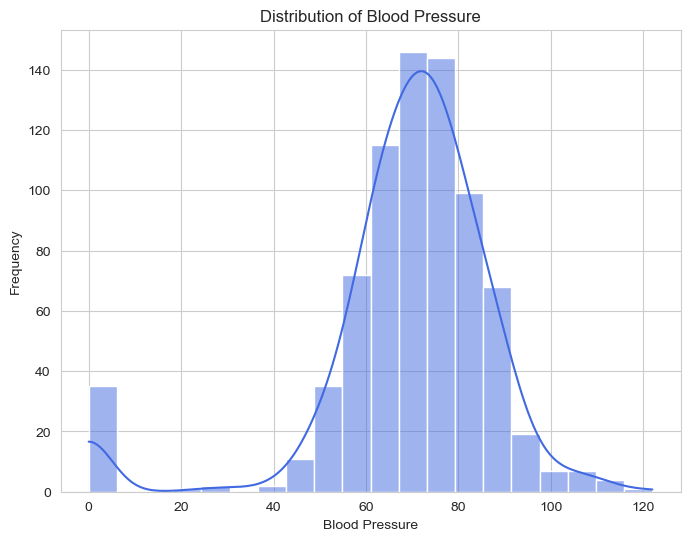

In [4]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['BloodPressure'], bins=20, kde=True, color='royalblue')
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Pressure")
plt.show()

Do you think the zero values are an outlier or missing data? How would the histogram look like without the zero values? Are there still outlier visible?

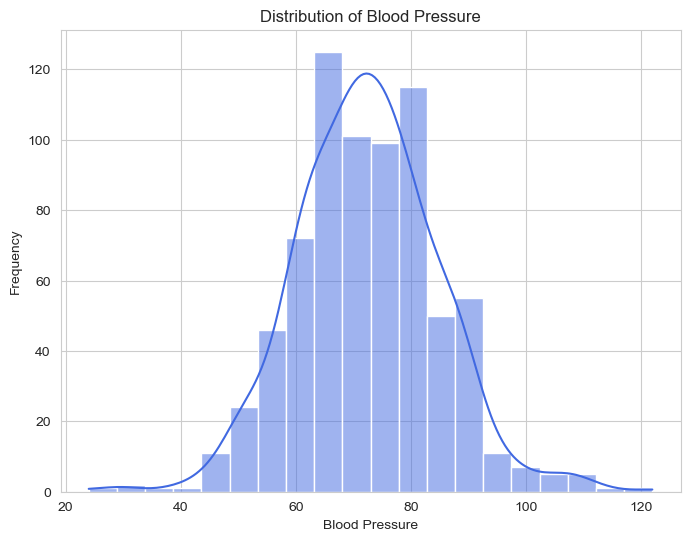

In [8]:
# Filter out zero values
filtered_bp = df[df['BloodPressure'] > 0]['BloodPressure']

# Create histogram
plt.figure(figsize=(8, 6))
sns.histplot(filtered_bp, bins=20, kde=True, color='royalblue')
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency")
plt.title("Distribution of Blood Pressure")
plt.show()

Let's use some more fine-grained methods to detect outlier. Create a Boxplot of "BloodPressure" and see if Tukey's fence reveals outlier!

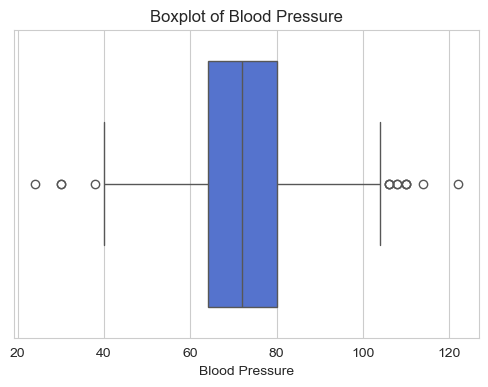

In [9]:
# Create boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=filtered_bp, color='royalblue')
plt.xlabel("Blood Pressure")
plt.title("Boxplot of Blood Pressure")
plt.show()

Can you think of a way to visualize the ±3SD method to detect outlier?

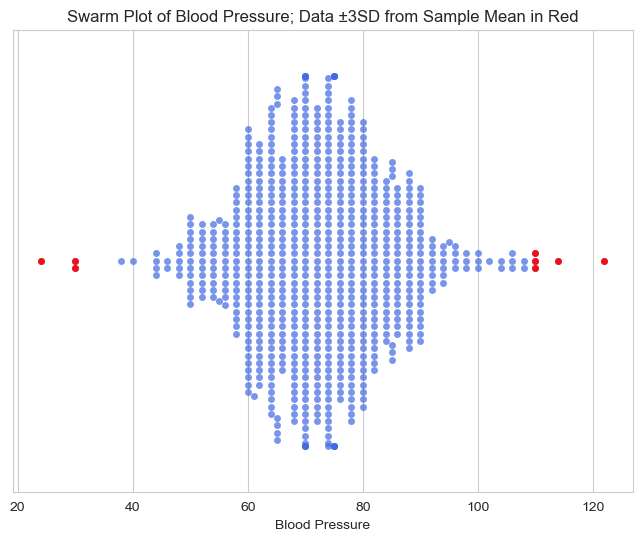

In [17]:

# Calculate mean and standard deviation
mean_bp = filtered_bp.mean()
std_bp = filtered_bp.std()

# Identify outliers (3 standard deviations from mean)
outliers = (filtered_bp < (mean_bp - 3 * std_bp)) | (filtered_bp > (mean_bp + 3 * std_bp))

# Create swarm plot
plt.figure(figsize=(8, 6))
sns.swarmplot(x=filtered_bp, color="royalblue", alpha=0.7)
sns.swarmplot(x=filtered_bp[outliers], color="red", alpha=0.9)
plt.xlabel("Blood Pressure")
plt.title("Swarm Plot of Blood Pressure; Data ±3SD from Sample Mean in Red")
plt.show()

Are the outliers detected by Tukey's Fence and ±3SD method identical? Test it!

In [26]:
outlier_df = pd.DataFrame({"ID": df.index})

# Calculate Tukey's Fence outliers
Q1 = filtered_bp.quantile(0.25)
Q3 = filtered_bp.quantile(0.75)
IQR = Q3 - Q1
tukey_lower = Q1 - 1.5 * IQR
tukey_upper = Q3 + 1.5 * IQR
tukey_outliers = (df["BloodPressure"] < tukey_lower) | (df["BloodPressure"] > tukey_upper)

# Calculate ±3 SD outliers
mean_bp = filtered_bp.mean()
std_bp = filtered_bp.std()
sd_outliers = (df["BloodPressure"] < (mean_bp - 3 * std_bp)) | (df["BloodPressure"] > (mean_bp + 3 * std_bp))

# Assign outlier values to the DataFrame
outlier_df["tukey_outlier"] = tukey_outliers
outlier_df["sd_outlier"] = sd_outliers

# Determine if the methods match
outlier_df["match"] = outlier_df["tukey_outlier"] & outlier_df["sd_outlier"]

# Filter only rows where at least one method detected an outlier
outlier_df = outlier_df[outlier_df["tukey_outlier"] | outlier_df["sd_outlier"]]

outlier_df.head()

,ID,tukey_outlier,sd_outlier,match
7,7,True,True,True
15,15,True,True,True
18,18,True,True,True
43,43,True,True,True
49,49,True,True,True
